In [40]:
#libraries
import pandas as pd
import sys 
from imblearn.over_sampling import SMOTE
import seaborn as sns # used for plot interactive graph. 
import numpy as np # linear algebra
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt # this is used for the plot the graph 

In [24]:
testx=pd.read_csv("data files/testx.csv",index_col=0);
testy=pd.read_csv("data files/testy.csv",index_col=0);
trainx=pd.read_csv("data files/trainx.csv",index_col=0);
trainy=pd.read_csv("data files/trainy.csv",index_col=0);

In [25]:
testx.head()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip
0,15.905556,15.905556,0.88,26.3879,358.0,11.0446,1006.64,1.0
1,11.527778,11.527778,0.87,16.5830,128.0,7.7280,1014.28,1.0
2,-3.905556,-3.905556,0.92,3.1717,174.0,0.1771,1024.26,0.0
3,13.333333,13.333333,0.91,6.9552,35.0,14.3290,1018.11,1.0
4,12.600000,12.600000,0.84,3.2200,310.0,9.9820,1020.41,1.0


In [26]:
trainx.head()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precip
0,27.777778,26.966667,0.31,4.1860,270.0,16.1000,1016.80,1.0
1,12.072222,12.072222,0.64,13.6850,210.0,16.1000,1016.88,1.0
2,17.550000,17.550000,0.74,7.7763,171.0,9.9820,1013.55,1.0
3,15.088889,15.088889,0.93,3.4615,97.0,11.4471,1006.14,1.0
4,22.233333,22.233333,0.76,5.7155,57.0,6.1019,1014.39,1.0


In [27]:
trainy.head()

,summary
0,1
1,1
2,1
3,2
4,1


max accuracy of 0.4762364105639127 at k= 19


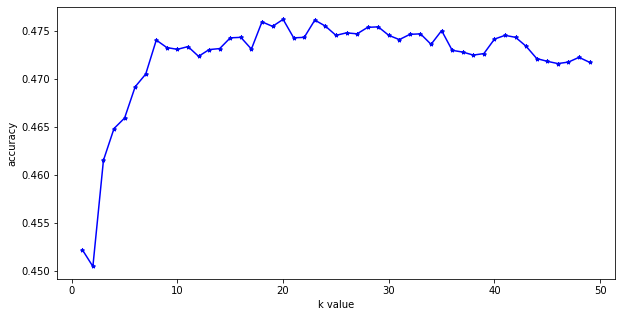

In [48]:
#we want the maximum accuracy for the model, deciding best k value
accuracy=[];#array for all the accuracies for the different k values

for i in range(1,50):#test all k values from 1 to 50
    classifier=KNeighborsClassifier(n_neighbors=i);
    classifier.fit(trainx,trainy.values.ravel());
    prediction=classifier.predict(testx);#predict the value
    accuracy.append(metrics.accuracy_score(testy,prediction));#add accuracy to the array
    

#plot k value vs accuracy     
plt.figure(figsize=(10,5));
plt.plot(range(1,50),accuracy,color='blue', linestyle='-', marker='*', markerfacecolor='green',markersize=4);
plt.xlabel('k value');
plt.ylabel('accuracy');
print("max accuracy of", max(accuracy),"at k=",accuracy.index(max(accuracy)));

In [29]:
#lines below this were the first attempt of implementing knn with k=5

classifier=KNeighborsClassifier(n_neighbors=5);
classifier.fit(trainx,trainy.values.ravel());

In [30]:
prediction=classifier.predict(testx)

In [32]:
print (prediction)


[3 3 5 ... 2 3 2]


In [35]:
print(confusion_matrix(testy,prediction))
print(classification_report(testy,prediction))

[[7894 3302  790  732   73    0    2    3]
 [5003 4505 1243  415   74    7    3    3]
 [1653 2127 2330  214  246    7    0    1]
 [2185  909  330  875   89    0    0    1]
 [  88  132  415   87 2082    0    0    0]
 [  18   29   37    1    1   67   29   13]
 [  19   37   15    0    0   43   64   29]
 [  25   19    4    3    0    5   24   55]]
              precision    recall  f1-score   support

           1       0.47      0.62      0.53     12796
           2       0.41      0.40      0.40     11253
           3       0.45      0.35      0.40      6578
           4       0.38      0.20      0.26      4389
           5       0.81      0.74      0.78      2804
           6       0.52      0.34      0.41       195
           7       0.52      0.31      0.39       207
           8       0.52      0.41      0.46       135

    accuracy                           0.47     38357
   macro avg       0.51      0.42      0.45     38357
weighted avg       0.46      0.47      0.46     38357

